In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
# reading the csv file
data=pd.read_csv("vehicle.csv")

# 1. Data pre-processing

In [3]:
# display the first five records of the dataframe 
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
# display the size of the dataframe
data.shape

(846, 19)

In [5]:
# as we know 'class' is inbult in python library,we can't use the column name 'class'
# so let's change the column name 'class' to 'veh_type'
data.columns=['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio','veh_type']

In [6]:
#display the first five records
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio veh_type  
0             187.0            197      van  
1             189.0            199      van  
2             188.0            196      car  
3             199.0            207      van  
4             180.0            183      bus

In [7]:
# display the size of the dataframe
data.shape

(846, 19)

In [8]:
# getting the no of values in each column as well as the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [9]:
# checking the presence of missing values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
veh_type                       0
dtype: int64

In [10]:
# filling the missing values with median
data.fillna(data.median(),inplace=True)

In [11]:
# confirming that there are no missing values further
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
veh_type                       0
dtype: int64

In [12]:
# replaing special characters(if any) with nan values
data.replace(['?','*','$','-','!','#','^','%'],np.nan,inplace=True)

In [13]:
# checking the presence of nan values
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
veh_type                       0
dtype: int64

In [14]:
# checking whether there are duplicates
data.duplicated().sum()

0

In [15]:
# creating a list of numerical variables
numvarlist=['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']

In [16]:
# Outlier analysis
z=np.abs(stats.zscore(data[numvarlist]))
print(z)

[[0.16058035 0.51807313 0.05717723 ... 0.3808703  0.31201194 0.18395733]
 [0.32546965 0.62373151 0.12074088 ... 0.15679779 0.01326483 0.45297703]
 [1.25419283 0.84430302 1.51914112 ... 0.40338349 0.14937355 0.04944748]
 ...
 [1.49721783 1.49676282 1.20132288 ... 0.96356477 0.31201194 0.72199673]
 [0.93303214 1.43930625 0.26064101 ... 1.38919659 0.17590322 0.08506238]
 [1.05454464 1.43930625 1.02340478 ... 0.60494281 0.47465032 0.75761164]]


In [17]:
#setting threshold
threshold=3.5
print(np.where(z>threshold))

(array([  4,   4,   4,  37,  37,  37,  37, 100, 100, 100, 135, 135, 135,
       291, 291, 388, 388, 388, 388, 388, 391, 523, 523, 706, 706, 706],
      dtype=int64), array([ 4,  5, 13,  3,  4,  5, 13,  4,  5, 13,  3,  4,  5,  4,  5,  3,  4,
        5, 10, 13,  5,  4,  5,  4,  5, 13], dtype=int64))


In [18]:
# creating a dataframe without outliers
data=data[(np.abs(stats.zscore(data[numvarlist]))<=threshold).all(axis=1)]
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio veh_type  
0             187.0            197      van  
1             189.0            199      van  
2             188.0            196      car  
3             199.0            207      van  
5             181.0            183      bus

In [19]:
data.shape

(837, 19)

In [20]:
# label encoding vehicle type
enc=LabelEncoder()
data.veh_type=enc.fit_transform(data.veh_type)


In [21]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  veh_type  
0             187.0            197         2  
1             189.0            199         2  
2             188.0            196         1  
3             199.0            207         2  
5             181.0            183         0

In [22]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  veh_type  
0             187.0            197         2  
1             189.0            199         2  
2             188.0            196         1  
3             199.0            207         2  
5             181.0            183         0

# 2. Understanding the attributes

## Exploratory Data Analysis

In [23]:
X=data.iloc[:,:-1]
y=data.veh_type

In [24]:
X.shape

(837, 18)

In [25]:
y.shape

(837,)

In [26]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
5                  50.0                        6          255.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
5           26.0                    28.0                        169   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
5            280.0              957.0                      264.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
5                         85.0             5.0               9.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
5             181.0            183

In [27]:
# Display a description of the dataset
display(X.describe())

compactness  circularity  distance_circularity  radius_ratio  \
count   837.000000   837.000000            837.000000    837.000000   
mean     93.739546    44.827957             82.156511    167.936679   
std       8.247605     6.160068             15.798541     31.851135   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    194.000000   
max     119.000000    59.000000            112.000000    246.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            837.000000               837.000000     837.000000   
mean              61.150538                 8.158901     169.094385   
std                5.641082                 2.225307      33.309401   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     199.000000   
max               76.000000                22.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     837.000000              837.000000                 837.000000   
mean       40.893668               20.597372                 147.971326   
std         7.841243                2.596306                  14.568733   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       837.000000         837.000000                 837.000000   
mean        188.125448         440.479092                 174.698925   
std          30.879102         177.066360                  32.662432   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         178.000000         365.000000                 173.000000   
75%         216.000000         589.000000                 198.000000   
max         288.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   837.000000      837.000000        837.000000   
mean                     72.095579        6.377539         12.621266   
std                       6.368973        4.909065          8.965173   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                      90.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        837.000000     837.000000  
mean         188.955795     195.655914  
std            6.162217       7.451189  
min          176.000000     181.000000  
25%          184.000000     190.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

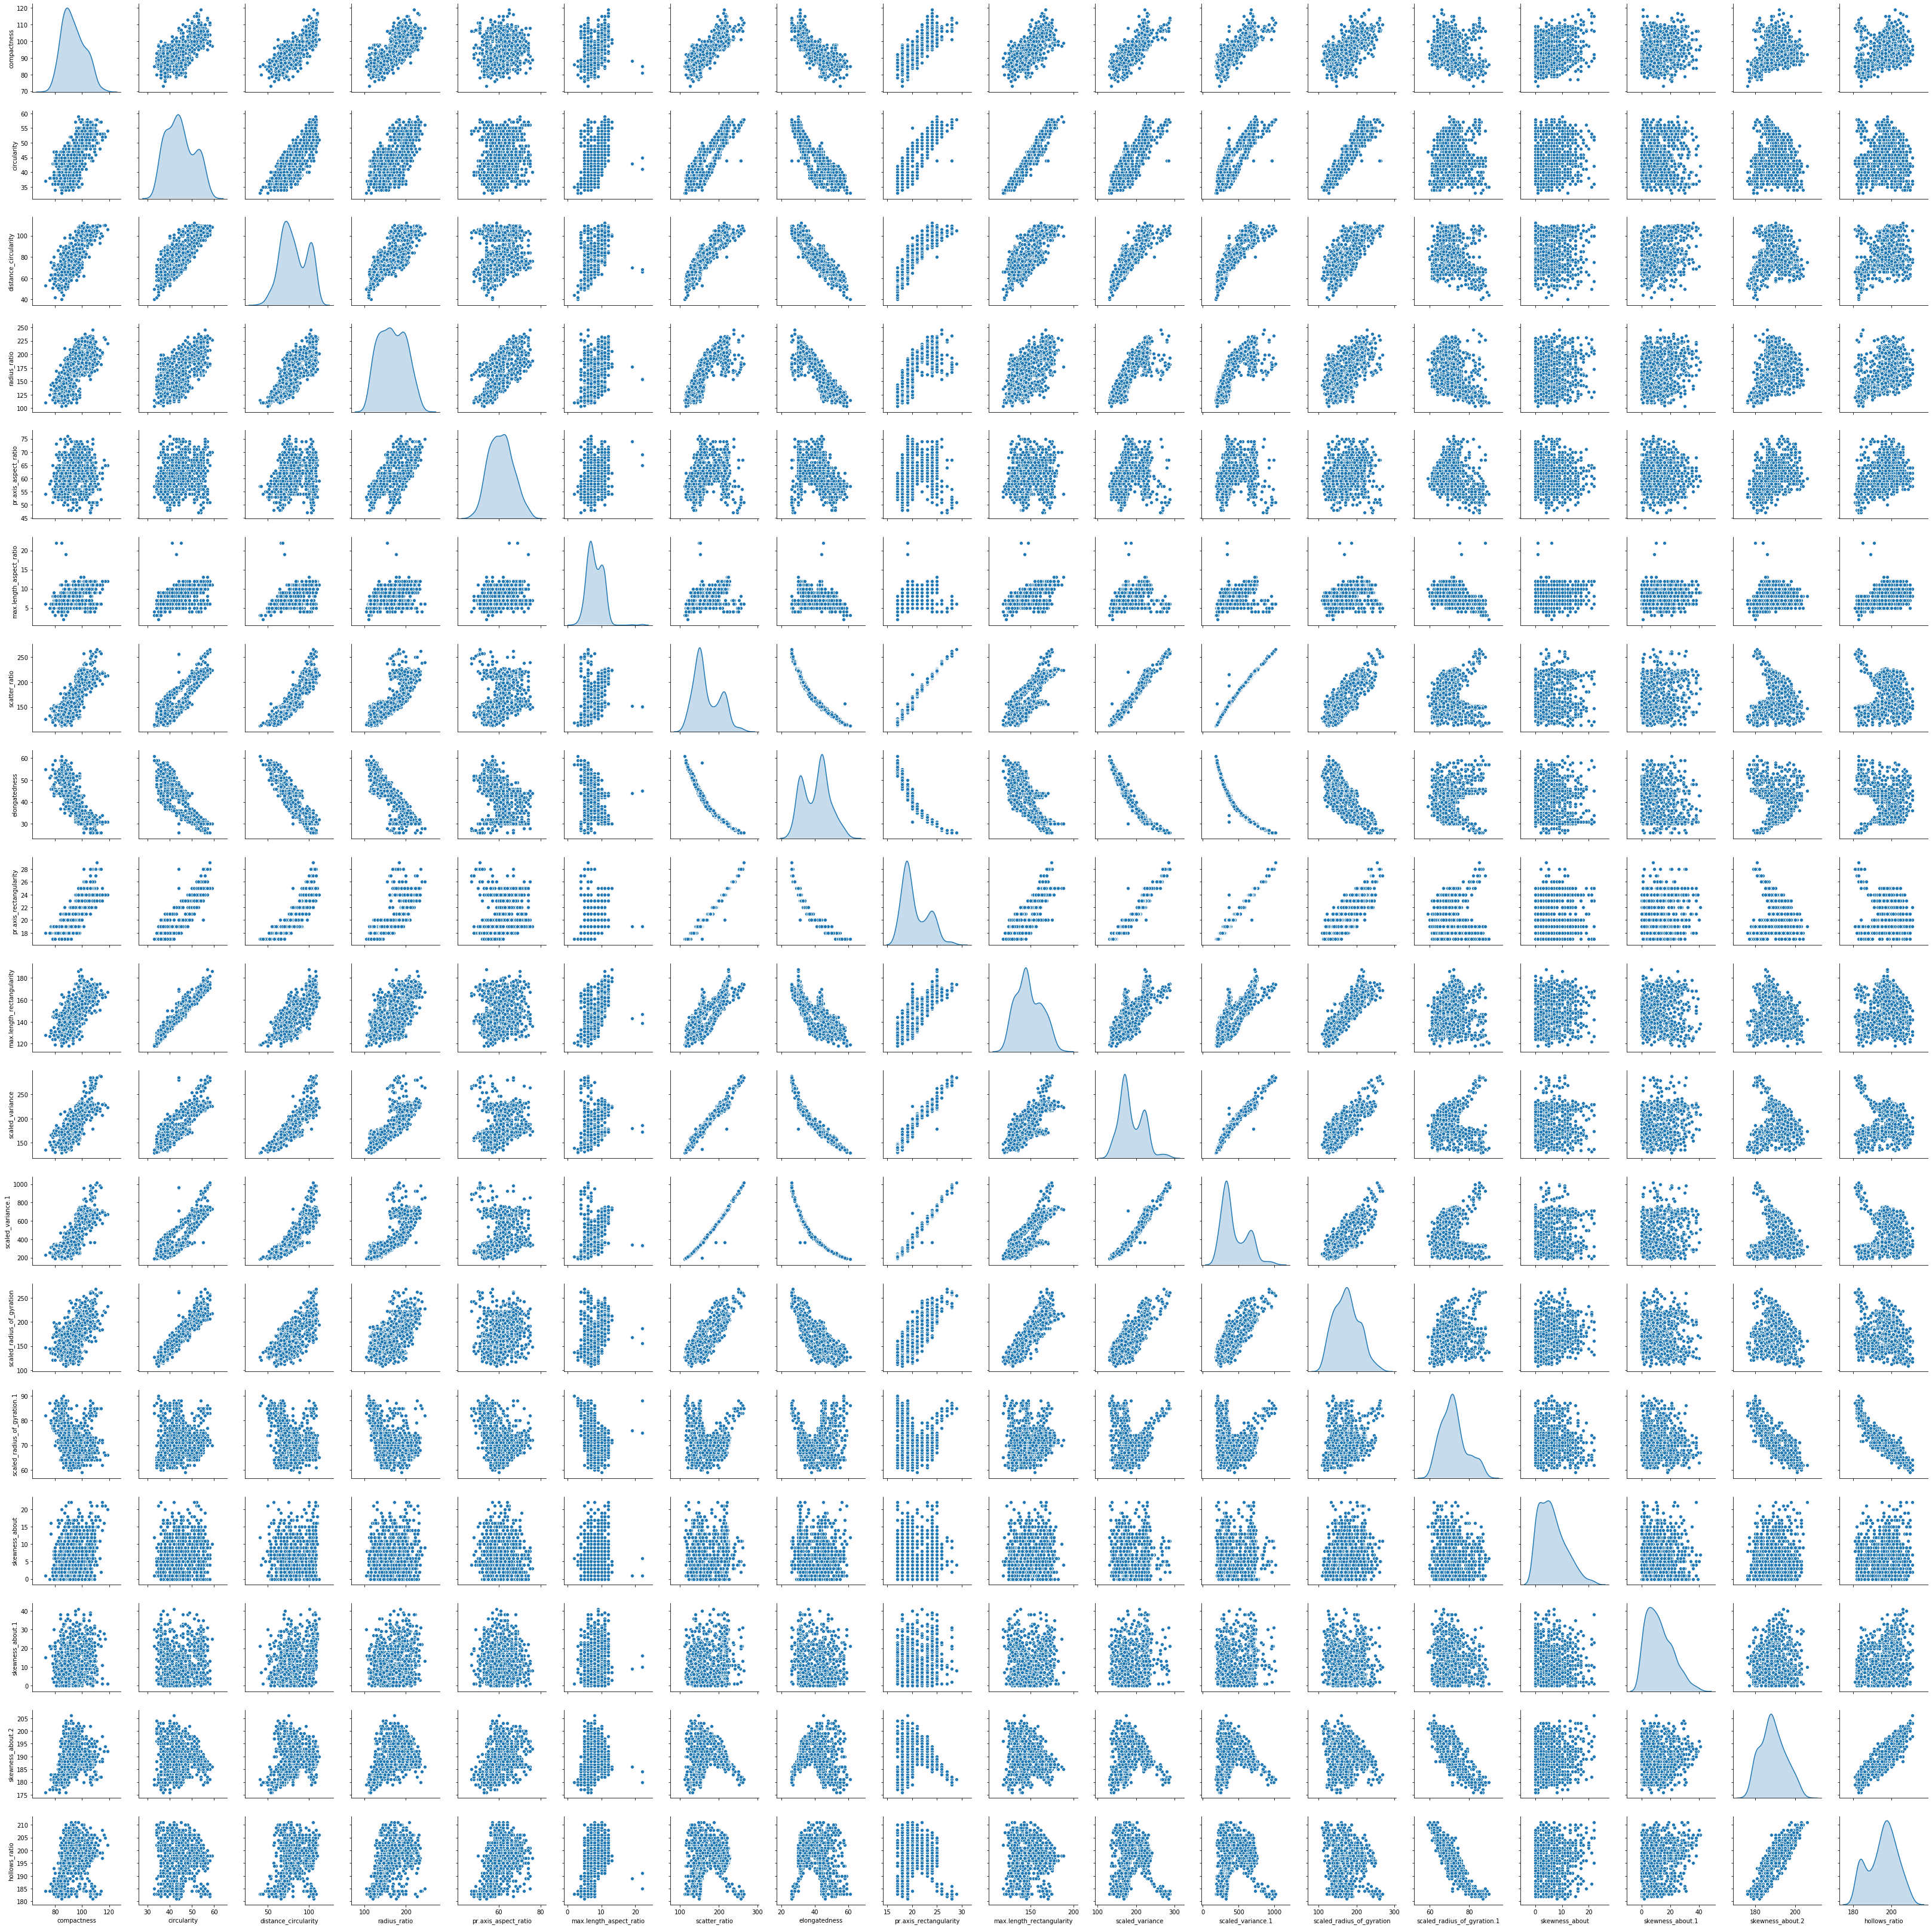

In [28]:
# visualize feature distributions
# we can construct a scatter matrix of each of the features present in the data
#pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sb.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

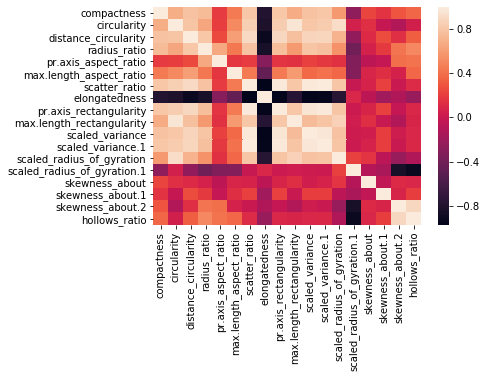

In [29]:
sb.heatmap(X.corr())

- Using the scatter matrix as a reference, we can discuss the following:
- From the scatter plots and the heatmap of correlation, we can see that:
- There is a strong negative correlation between elongatedness and most of the other variables.therefore elongatedness is highly dependent on most of the other variables
- There is a strong positive correlation among pr.axis rectangularity and most of the other variables
- There is a strong positive correlation between circularity and distance_cirularity and any of the one can be discarded for feature selection
- There is a strong positive correlation between scaled variance and scaled_variance.1, so any of the one can be discarded for feature selection
- There is a strong dependency between skewness_about.2 and hollows ration,we can choose any of the one


In [30]:
# feature selection
# creating a list of selected features for analysis
list=['compactness','circularity','pr.axis_aspect_ratio','max.length_aspect_ratio','pr.axis_rectangularity','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','hollows_ratio']

In [31]:
# Calling StandardScaler and fitting and transforming the required data
X[numvarlist] = StandardScaler().fit_transform(X[numvarlist])

In [32]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.152918     0.515244              0.053422      0.316138   
1    -0.332361    -0.621786              0.116757     -0.846211   
2     1.244796     0.840110              1.510123      1.289997   
3    -0.089722    -0.621786             -0.009913     -0.280744   
5     1.608756    -0.134487              1.510123      0.127649   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.924444                 0.827841      -0.213112   
1             -0.736210                 0.378196      -0.603625   
2              0.860183                 0.827841       1.138666   
3              0.328052                 0.378196      -0.753823   
5             -1.977848                -0.970739       2.580562   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.141176               -0.230223                   0.757462   
1       0.523997               -0.615616                  -0.341437   
2      -1.134895                0.925956                   0.688781   
3       0.651604               -0.615616                  -0.341437   
5      -1.900537                2.852920                   1.444274   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.392910          -0.347417                   0.284934   
1        -0.587332          -0.624315                  -0.511564   
2         1.130065           1.099233                   1.387777   
3        -0.911369          -0.742985                  -1.461234   
5         2.977078           2.918848                   2.735695   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.329226       -0.076952          0.377099   
1                    -0.015016        0.534527          0.153880   
2                     0.142089        1.553660         -0.404167   
3                    -1.428962       -0.076952         -0.292558   
5                     2.027350       -0.280779         -0.404167   

   skewness_about.2  hollows_ratio  
0         -0.317575       0.180493  
1          0.007178       0.449067  
2         -0.155198       0.046206  
3          1.630941       1.523363  
5         -1.291832      -1.699525

In [33]:
X.shape

(837, 18)

In [34]:
# creating a dataframe X1 with selected features
X1=pd.DataFrame(X[list])

In [35]:
X1.head()

compactness  circularity  pr.axis_aspect_ratio  max.length_aspect_ratio  \
0     0.152918     0.515244              1.924444                 0.827841   
1    -0.332361    -0.621786             -0.736210                 0.378196   
2     1.244796     0.840110              0.860183                 0.827841   
3    -0.089722    -0.621786              0.328052                 0.378196   
5     1.608756    -0.134487             -1.977848                -0.970739   

   pr.axis_rectangularity  scaled_radius_of_gyration.1  skewness_about  \
0               -0.230223                    -0.329226       -0.076952   
1               -0.615616                    -0.015016        0.534527   
2                0.925956                     0.142089        1.553660   
3               -0.615616                    -1.428962       -0.076952   
5                2.852920                     2.027350       -0.280779   

   skewness_about.1  hollows_ratio  
0          0.377099       0.180493  
1          0.153880       0.449067  
2         -0.404167       0.046206  
3         -0.292558       1.523363  
5         -0.404167      -1.699525

In [36]:
X1.shape

(837, 9)

In [37]:
y.shape

(837,)

# 3. Split the data into train and test

In [38]:
# splitting the raw data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [39]:
# also, creating a traing and test set of the data with selected features
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=10)

In [40]:
X1_train.shape

(585, 9)

In [41]:
y_train.shape

(585,)

# 4. Train a Support vector machine using the train set and get the accuracy on the test set

## SVM

In [42]:
# creating an SVM model with selected features
model=SVC(kernel='rbf',C=10,gamma='scale')
model.fit(X1_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_predict=model.predict(X1_test)

In [44]:
# getting the accuracy score of the svm model with selected features
accuracy_score(y_test,y_predict)

0.9325396825396826

In [45]:
# creating svm model with all features
model1=SVC(kernel='rbf',C=10, gamma='scale')
model1.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_predict=model1.predict(X_test)

In [47]:
# getting the accuracy score of the svm model with all features
accuracy_score(y_test,y_predict)

0.9761904761904762

# 5. Perform K-fold cross validation and get the cross validation score of the model

In [48]:
# We can find the optimum value of C by using the k-fold cross-validation
# We’ll use 10-fold cross-validation on our dataset using a generated list of C’s ranging from 1–15
# Creating list C for SVM
values =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for val in values:
    model = SVC(C=val, gamma='scale')
    scores = cross_val_score(model,X1_train,y_train,cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())

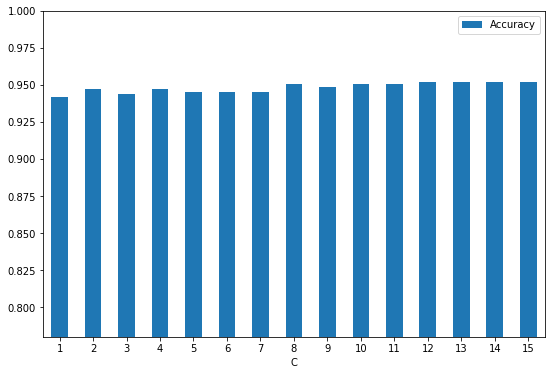

In [49]:
# plotting the accuracy score
%matplotlib inline
def plot_accuracy(svm_list_scores):
    pd.DataFrame({"C":[i for i in values], "Accuracy":svm_list_scores}).set_index("C").plot.bar(figsize= (9,6),ylim=(0.78,1),rot=0)
    plt.show()
plot_accuracy(cv_scores)

In [50]:
# the score is maximum at C=9

In [51]:
model=SVC(kernel='rbf',C=9, gamma='scale')
model.fit(X1_train,y_train)

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
y_predict=model.predict(X1_test)

In [53]:
accuracy_score(y_test,y_predict)

0.9325396825396826

In [54]:
# We can find the optimum value of C by using the k-fold cross-validation
# We’ll use 10-fold cross-validation on our dataset using a generated list of C’s ranging from 1–15
# Creating list C for SVM
values =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for val in values:
    model = SVC(C=val, gamma='scale')
    scores = cross_val_score(model,X_train,y_train,cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())

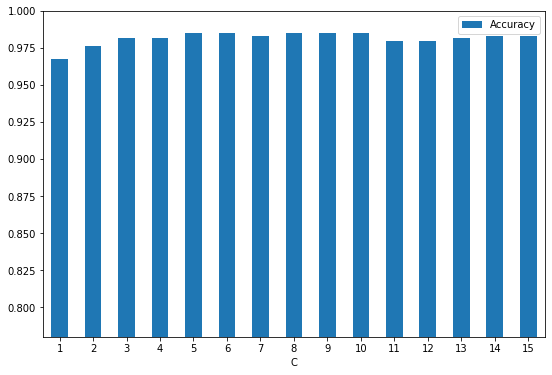

In [55]:
# plotting the accuracy score
%matplotlib inline
def plot_accuracy(svm_list_scores):
    pd.DataFrame({"C":[i for i in values], "Accuracy":svm_list_scores}).set_index("C").plot.bar(figsize= (9,6),ylim=(0.78,1),rot=0)
    plt.show()
plot_accuracy(cv_scores)

In [56]:
# the score is maximum at C=10

In [57]:
model1=SVC(kernel='rbf',C=10, gamma='scale')
model1.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_predict=model1.predict(X_test)

In [59]:
accuracy_score(y_test,y_predict)

0.9761904761904762

# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

# PCA

In [60]:
# displaying the dataframe with all the features scaled
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.152918     0.515244              0.053422      0.316138   
1    -0.332361    -0.621786              0.116757     -0.846211   
2     1.244796     0.840110              1.510123      1.289997   
3    -0.089722    -0.621786             -0.009913     -0.280744   
5     1.608756    -0.134487              1.510123      0.127649   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.924444                 0.827841      -0.213112   
1             -0.736210                 0.378196      -0.603625   
2              0.860183                 0.827841       1.138666   
3              0.328052                 0.378196      -0.753823   
5             -1.977848                -0.970739       2.580562   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.141176               -0.230223                   0.757462   
1       0.523997               -0.615616                  -0.341437   
2      -1.134895                0.925956                   0.688781   
3       0.651604               -0.615616                  -0.341437   
5      -1.900537                2.852920                   1.444274   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.392910          -0.347417                   0.284934   
1        -0.587332          -0.624315                  -0.511564   
2         1.130065           1.099233                   1.387777   
3        -0.911369          -0.742985                  -1.461234   
5         2.977078           2.918848                   2.735695   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.329226       -0.076952          0.377099   
1                    -0.015016        0.534527          0.153880   
2                     0.142089        1.553660         -0.404167   
3                    -1.428962       -0.076952         -0.292558   
5                     2.027350       -0.280779         -0.404167   

   skewness_about.2  hollows_ratio  
0         -0.317575       0.180493  
1          0.007178       0.449067  
2         -0.155198       0.046206  
3          1.630941       1.523363  
5         -1.291832      -1.699525

In [61]:
# displaying the size of the dataframe
X.shape

(837, 18)

In [62]:
# producing the covariance matrix
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.00119617e+00  6.88389648e-01  7.90997389e-01  7.49105772e-01
   1.94055439e-01  4.47410733e-01  8.13524729e-01 -7.89621856e-01
   8.14827390e-01  6.80841384e-01  7.91454650e-01  8.14872801e-01
   5.89876613e-01 -2.55979396e-01  2.34631093e-01  1.55236169e-01
   2.95806773e-01  3.64672170e-01]
 [ 6.88389648e-01  1.00119617e+00  7.93916287e-01  6.50551629e-01
   2.04980404e-01  5.22781677e-01  8.50508173e-01 -8.23606976e-01
   8.46156531e-01  9.63318322e-01  8.10644432e-01  8.38752968e-01
   9.27097547e-01  5.36254848e-02  1.45199240e-01 -1.20687758e-02
  -1.03871979e-01  4.79421709e-02]
 [ 7.90997389e-01  7.93916287e-01  1.00119617e+00  8.15106226e-01
   2.45878194e-01  6.12253012e-01  9.06769875e-01 -9.12905712e-01
   8.94884219e-01  7.76530772e-01  8.84464767e-01  8.87796405e-01
   7.08207775e-01 -2.51213602e-01  1.13242887e-01  2.64458157e-01
   1.44933979e-01  3.32867472e-01]
 [ 7.49105772e-01  6.50551629e-01  8.15106226e-01  1.00119617e+00
   6.61833084e-01  4.41429436e-01  7.

In [63]:
pca = PCA(n_components=18)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
# the eigen values
print(pca.explained_variance_)

[9.77900344e+00 3.37018808e+00 1.19783685e+00 1.12646473e+00
 8.97300375e-01 6.74738946e-01 3.31621716e-01 2.20481975e-01
 1.18458494e-01 8.48888807e-02 6.41309408e-02 4.74286953e-02
 3.23999314e-02 2.71175649e-02 1.95739881e-02 1.72092404e-02
 9.72688778e-03 2.96035818e-03]


In [65]:
# the eigen vectors
print(pca.components_)

[[ 2.72908218e-01  2.86714705e-01  3.01736387e-01  2.74092784e-01
   9.85170962e-02  1.80318562e-01  3.10726761e-01 -3.08978698e-01
   3.07554501e-01  2.77424430e-01  3.03210703e-01  3.07017063e-01
   2.63279613e-01 -4.61573944e-02  4.14380419e-02  5.85728057e-02
   3.82557554e-02  8.42400297e-02]
 [-8.58513407e-02  1.29816075e-01 -4.65389600e-02 -2.01911696e-01
  -2.58165407e-01 -9.90496012e-02  7.55294521e-02 -1.26145803e-02
   8.78680433e-02  1.20832748e-01  7.53669649e-02  8.29545959e-02
   2.08469515e-01  5.03573171e-01 -3.89231181e-02 -9.41239692e-02
  -5.01636998e-01 -5.06533931e-01]
 [-4.41208981e-02 -2.04950751e-01  6.76601453e-02  5.90833860e-02
  -6.12568505e-02 -1.54591366e-01  1.09881067e-01 -9.53359710e-02
   1.06480007e-01 -2.17492092e-01  1.45019395e-01  1.11444073e-01
  -2.06591453e-01  6.78734426e-02 -5.52482589e-01  6.71159230e-01
  -5.37102977e-02 -3.48072757e-02]
 [ 1.50731029e-01 -4.46987701e-02  9.96445563e-02 -2.35407289e-01
  -6.09693231e-01  2.13037764e-01  9.

In [66]:
# getting the explained variance ratio
print(pca.explained_variance_ratio_)

[5.42628891e-01 1.87008976e-01 6.64669859e-02 6.25066054e-02
 4.97904629e-02 3.74407115e-02 1.84014174e-02 1.22343642e-02
 6.57316482e-03 4.71041446e-03 3.55857338e-03 2.63177945e-03
 1.79784565e-03 1.50473147e-03 1.08614457e-03 9.54926653e-04
 5.39737036e-04 1.64267851e-04]


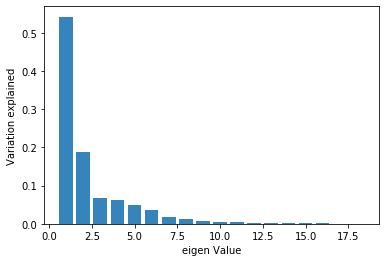

In [67]:
# visualising the explained variance ratio in bar plot
plt.bar(range(1,19),pca.explained_variance_ratio_,alpha=0.9, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

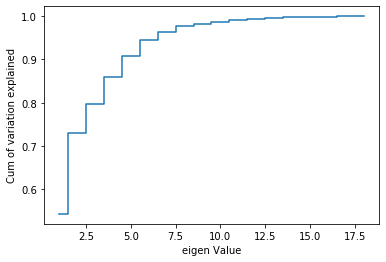

In [68]:
plt.step(range(1,19),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [69]:
# from the above graph and explained_variance_ratio, we can infer thatthe first 6 PCA components contribute most of the information
# so we select the first 6 pca components
pca6 = PCA(n_components=6)
pca6.fit(X)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X)

[[ 2.72908218e-01  2.86714705e-01  3.01736387e-01  2.74092784e-01
   9.85170962e-02  1.80318562e-01  3.10726761e-01 -3.08978698e-01
   3.07554501e-01  2.77424430e-01  3.03210703e-01  3.07017063e-01
   2.63279613e-01 -4.61573944e-02  4.14380419e-02  5.85728057e-02
   3.82557554e-02  8.42400297e-02]
 [-8.58513407e-02  1.29816075e-01 -4.65389600e-02 -2.01911696e-01
  -2.58165407e-01 -9.90496012e-02  7.55294521e-02 -1.26145803e-02
   8.78680433e-02  1.20832748e-01  7.53669649e-02  8.29545959e-02
   2.08469515e-01  5.03573171e-01 -3.89231181e-02 -9.41239692e-02
  -5.01636998e-01 -5.06533931e-01]
 [-4.41208981e-02 -2.04950751e-01  6.76601453e-02  5.90833860e-02
  -6.12568505e-02 -1.54591366e-01  1.09881067e-01 -9.53359710e-02
   1.06480007e-01 -2.17492092e-01  1.45019395e-01  1.11444073e-01
  -2.06591453e-01  6.78734426e-02 -5.52482589e-01  6.71159230e-01
  -5.37102977e-02 -3.48072757e-02]
 [ 1.50731029e-01 -4.46987701e-02  9.96445563e-02 -2.35407289e-01
  -6.09693231e-01  2.13037764e-01  9.

In [70]:
Xpca6

array([[ 5.46960375e-01, -6.67400844e-01, -4.32573373e-01,
        -8.75489429e-01,  9.93397323e-01,  1.62807425e+00],
       [-1.53803285e+00, -3.58325513e-01, -2.79080103e-01,
         1.15973022e+00,  4.47621261e-01, -2.41703596e-03],
       [ 3.88179046e+00,  2.01522968e-01, -1.16085161e+00,
         1.10508259e-01, -6.72683158e-01,  8.10266668e-01],
       ...,
       [ 5.05558074e+00, -1.39486230e-01, -4.98281756e-01,
        -1.13743919e+00,  1.15088414e+00, -3.82438989e-01],
       [-3.29286277e+00, -1.07061510e+00,  1.90009363e+00,
         3.98400879e-01,  4.94918567e-01, -1.25654414e-01],
       [-4.94141667e+00,  4.16083412e-01,  1.25617067e+00,
         3.09188073e-01,  7.90637961e-02, -4.18854766e-01]])

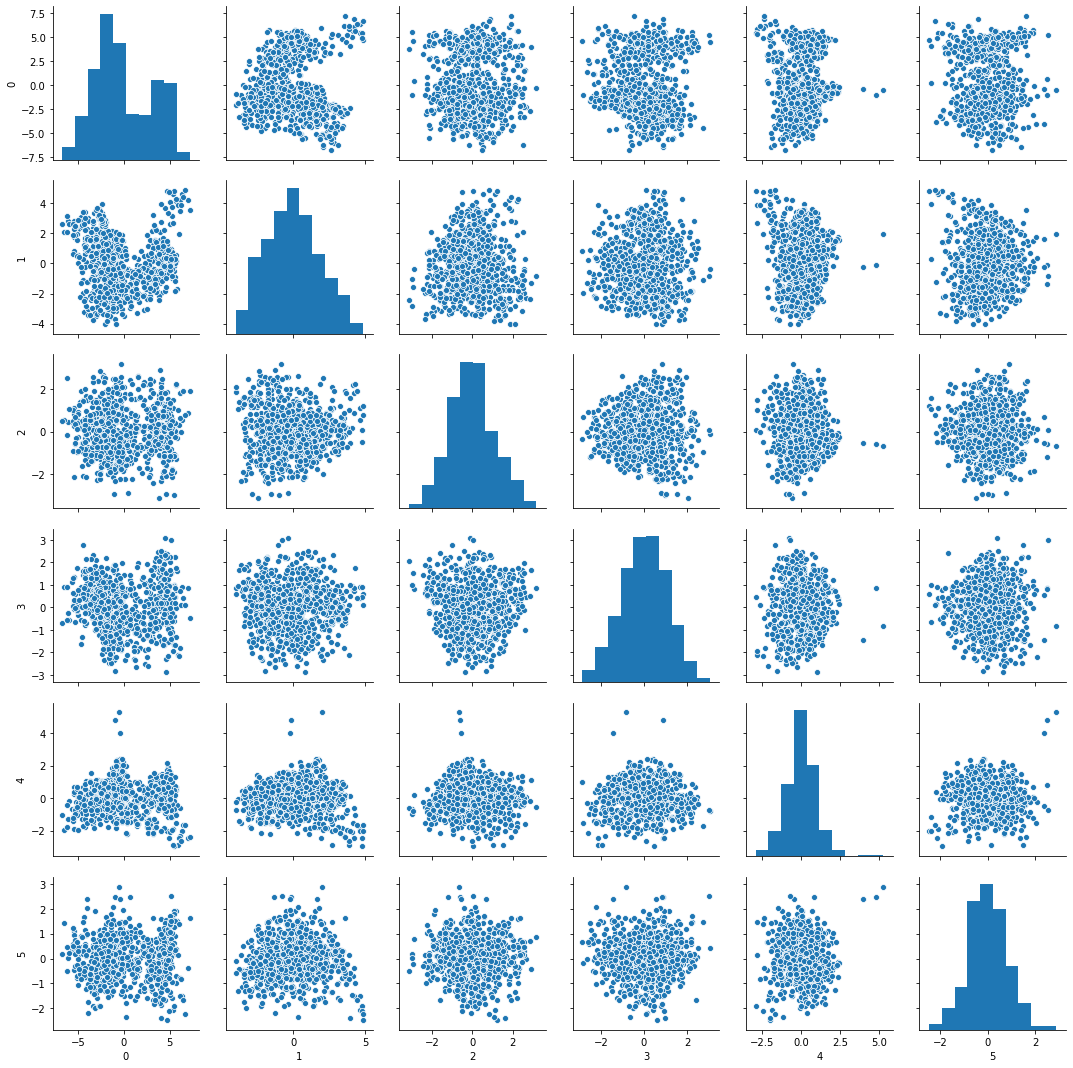

In [71]:
# now, from the pairplot we can see the datapoints are dependent of each other
sb.pairplot(pd.DataFrame(Xpca6))

# 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

In [72]:
# creating a dataframe containing the 6 pca components
df1=pd.DataFrame(Xpca6)

In [73]:
# getting the first five records
df1.head()

0         1         2         3         4         5
0  0.546960 -0.667401 -0.432573 -0.875489  0.993397  1.628074
1 -1.538033 -0.358326 -0.279080  1.159730  0.447621 -0.002417
2  3.881790  0.201523 -1.160852  0.110508 -0.672683  0.810267
3 -1.554616 -3.012299 -0.405207  0.192979  0.564780 -0.533300
4  5.386014  4.614818  1.133790  0.431318 -1.883499 -2.088302

In [74]:
df1.shape

(837, 6)

In [75]:
# splitting the data intotrain and test data
X_train,X_test,y_train,y_test=train_test_split(df1,y,test_size=0.3,random_state=10)

In [76]:
X_train.shape

(585, 6)

In [77]:
# creating an svm model with the given pca components
svm_model_pca=SVC(gamma='scale')
svm_model_pca.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
y_predict=svm_model_pca.predict(X_test)

In [79]:
# getting the accuracy score of the svm model with the given pca components
accuracy_score(y_test,y_predict)

0.9007936507936508

In [80]:
# We can find the optimum value of C by using the k-fold cross-validation
# We’ll use 10-fold cross-validation on our dataset using a generated list of C’s ranging from 1–15
# Creating list C for SVM
values =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for val in values:
    svm_model_pca = SVC(C=val,gamma='scale')
    scores = cross_val_score(svm_model_pca,X_train,y_train,cv = 10,scoring ="accuracy")
    cv_scores.append(scores.mean())

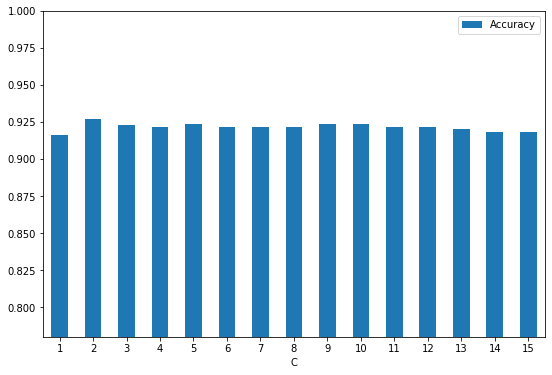

In [81]:
# plotting the accuracy score
%matplotlib inline
def plot_accuracy(svm_list_scores):
    pd.DataFrame({"C":[i for i in values], "Accuracy":svm_list_scores}).set_index("C").plot.bar(figsize= (9,6),ylim=(0.78,1),rot=0)
    plt.show()
plot_accuracy(cv_scores)

In [82]:
# C=3 gives the maximum score

In [83]:
# creating an svm model with the selected pca components using the c-value found using the K-fold cross validation
svm_model_pca=SVC(kernel='rbf',C=3,gamma='scale')
svm_model_pca.fit(X_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
y_predict=svm_model_pca.predict(X_test)

In [85]:
# getting the accuracy score of the model
accuracy_score(y_test,y_predict)

0.9166666666666666

# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

# Inference:
#1.The accuracy score of SVM using raw data(all features in the data) is: 97.61%, this after k-fold cross validation still gives 97.61%
#2.The accuracy score of SVM using data with selected features is: 93.25%, this after cross validation still gives 93.25%
#3.The accuracy score of SVM using the extracted pca components(using all features in the data) is: 92.46%, this after cross validation is still 92.46%
## Findings:
### This indicates that the model looses only 6% (97.61% reduced to 91.66%)of the accuracy score when the features are reduced from 18 to 6, which makes it a much efficient model
### Also, we can find that the accuracy of the models does not even have any impact in the accuracy score even after k-fold cross validation